In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import warnings

df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [27]:
#Data cleaning 
df['region'] = df['region'].str.capitalize()
df['sex'] = df['sex'].str.capitalize()
df['smoker'] = df['smoker'].str.capitalize()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,Female,27.900,0,Yes,Southwest,16884.92400
1,18,Male,33.770,1,No,Southeast,1725.55230
2,28,Male,33.000,3,No,Southeast,4449.46200
3,33,Male,22.705,0,No,Northwest,21984.47061
4,32,Male,28.880,0,No,Northwest,3866.85520


## Show summary statistics 

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


<AxesSubplot:>

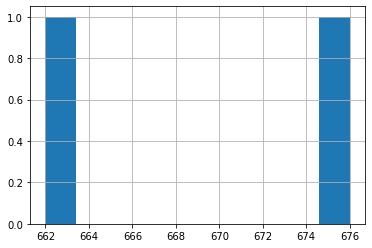

In [4]:
df.sex.value_counts().hist()

/Users/hasibazami/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


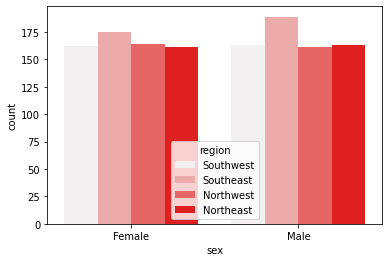

In [7]:
df.groupby(['bmi', 'charges'])['sex'].count()
sns.countplot('sex', hue='region',color='r', data=df)
plt.show()

In [9]:
men = df[df['sex'] == 'Male']['charges']
print('the charging rate for men is {:.2f}'.format(sum(men)/len(men)*100))

the charging rate for men is 1395675.12


/Users/hasibazami/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


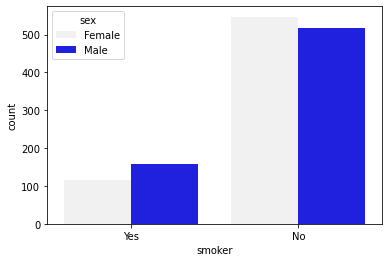

In [20]:
df.groupby(by=['smoker','sex'])['bmi'].count()
sns.countplot('smoker', hue='sex', color='b', data=df)
plt.show()
#Males who do smoke have a higher body mass index compared to women who smoke
#Women who dont smoke have a higher bmi compared to men who dont smoke

In [12]:
cats = df.select_dtypes(include=['object']).columns.tolist()
for i in cats:
    obs=df[i].value_counts()
    avg_claims=df.groupby(i)['charges'].mean()
    print('Variable:',i)
    display(pd.DataFrame({'Number of policyholders':obs, 'Average Claim Amount':avg_claims.map('${:,.2f}'.format)}))

Variable: sex


,Number of policyholders,Average Claim Amount
Female,662,"$12,569.58"
Male,676,"$13,956.75"


Variable: smoker


,Number of policyholders,Average Claim Amount
No,1064,"$8,434.27"
Yes,274,"$32,050.23"


Variable: region


,Number of policyholders,Average Claim Amount
Northeast,324,"$13,406.38"
Northwest,325,"$12,417.58"
Southeast,364,"$14,735.41"
Southwest,325,"$12,346.94"


/Users/hasibazami/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='charges'>

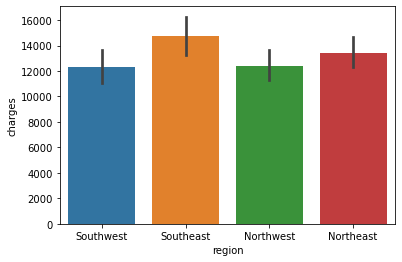

In [13]:
sns.barplot(df['region'], df['charges'], data=df)

/Users/hasibazami/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='charges'>

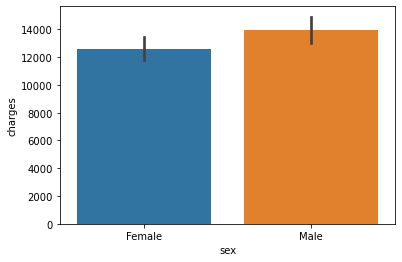

In [14]:
sns.barplot(df['sex'], df['charges'], data=df)

/Users/hasibazami/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children', ylabel='charges'>

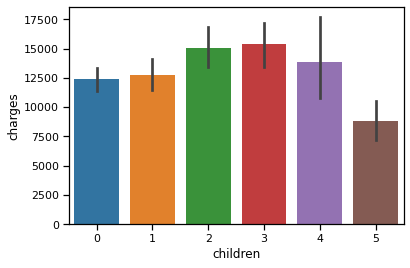

In [33]:
sns.barplot(df['children'], df['charges'], data=df)
#With 3 children, it is more costly in charges

<AxesSubplot:xlabel='bmi'>

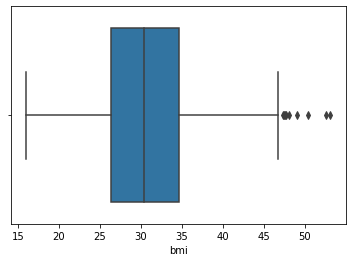

In [16]:
sns.boxplot(df['bmi'])

/Users/hasibazami/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

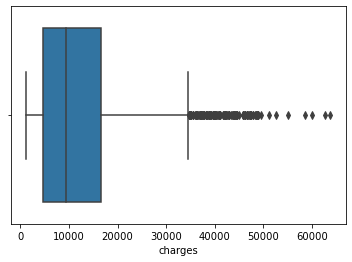

In [17]:
sns.boxplot(df['charges'])

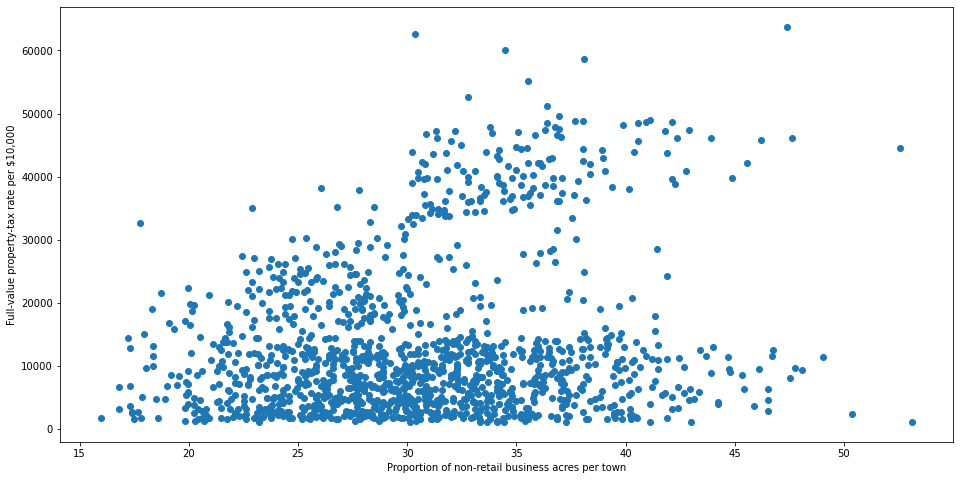

In [19]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['bmi'], df['charges'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

<ipython-input-28-f37d8c0ff007>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


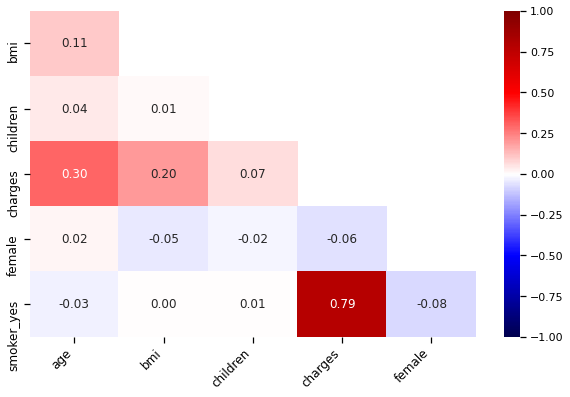

In [28]:
df['female'] = df['sex'].apply(lambda x: 1 if x=='Female' else 0)
df['smoker_yes'] = df['smoker'].apply(lambda x: 1 if x=='Yes' else 0)
df.drop(['sex', 'smoker'], axis=1, inplace=True)

sns.set_context("notebook")
fig, ax = plt.subplots(figsize=(10,6))   
corr=df.corr()
mask=np.triu(np.ones_like(corr, dtype=bool))[1:, :-1]
corr=corr.iloc[1:,:-1].copy()
ax=sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0, annot=True, fmt='.2f', 
               cmap='seismic', annot_kws={"fontsize":12})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
fig.show()

In [51]:
region_map = {'Northeast': 0, 'Northwest': 1, 'Southeast': 2, 'Southwest': 3}
df['region_binary'] = df['region'].map(region_map)

In [54]:
df.drop(columns='region', inplace=True)

In [60]:
X = df.drop(columns='charges')
y = df.charges
s = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train_scaled = s.fit_transform(X_train)
X_test_scaled = s.fit_transform(X_test)

#Linear Regression
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)).round(2)
r2 = r2_score(y_test, y_pred)

#Principle Component Analysis
pca = PCA(.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.fit_transform(X_test_scaled)
print("Number of Principle Components = {}".format(pca.n_components_))
print("Train Shape:{} {} Test Shape:{} {}".format(X_train_pca.shape, y_train.shape, X_test_pca.shape, y_test.shape))

Number of Principle Components = 6
Train Shape:(1070, 6) (1070,) Test Shape:(268, 6) (268,)


In [59]:
print(r2)

0.7623224022563388
